<a href="https://colab.research.google.com/github/TithiB-del/Collaboratory-notebooks/blob/main/iris_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network implementation on Iris dataset
In this notebook, we are implementing gradient descent on Iris dataset

In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
np.random.seed(187372311)

# %matplotlib inline
%matplotlib notebook
%matplotlib notebook

## Load the dataset

> Original dataset can be found here 
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris)

In [ ]:
# Load the dataset into pandas dataframe
iris = pd.read_csv('iris.data')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Convert the string categories into numeric categories, as computer does not understand English :(
iris['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace = True)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Now we need to scale the input features and encode the labels

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
encoder = OneHotEncoder()

In [ ]:
# The three output categories are being one hot encoded here
# e.g. Iris-setosa -> [1, 0, 0], Iris-versicolor -> [0, 1, 0], Iris-virginica -> [0, 0, 1]
X = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].as_matrix())
y = encoder.fit_transform(iris[['species']].as_matrix()).toarray()

## Lets split the data into training and testing dataset
> We use the train_test_split method available from scikit-learn with a train:test ratio of 2:1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=13)

## Some important functions are listed below
These are some well known activation functions
> **Sigmoid Activation Function:** 
${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$

> **Rectified Linear Unit(ReLU):**
${\displaystyle f(x)=x^{+}=\max(0,x)}$

> **Hyperbolic Tangent(tanh):** 
${\displaystyle f(x) = \tanh x={\frac {\sinh x}{\cosh x}}={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}={\frac {e^{2x}-1}{e^{2x}+1}}}$

To calculate loss, we use binary cross entropy
> **Binary Cross Entropy:**
${\displaystyle f(x)=-{\frac{1}{N}}\sum_{n=1}^{N}\bigg[y{\log \hat y} + (1 - y)\log (1 - \hat y)\bigg]}$

In [ ]:
# Activation function that we used here.
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def sig_derivative(x):
    # From a long process of finding the derivative of sigmoid function, we find the derivative to be,
    # σ'(x) = σ(x) * (1 - σ(x))
    # this function assumes that the input is already passed through sigmoid activation function
    return x * (1 - x)

# Another activation function(not used here)
def relu(x):
    return np.max(x, 0)

def relu_derivative(x):
    return (x > 0).astype(int)

# Cost/Loss function that we used here.
def cost_func(a, y):
    m = y.shape[1]
    logprob = np.multiply(y, np.log(a)) + np.multiply(1 - y, np.log(1 - a))
    bincross = -np.sum(logprob) / m
    return bincross

## Now we initialize the weights for the input layer and the hidden layer
> np.random.uniform is used to initialize the weights

In [ ]:
def weightgen(hidden_nodes=6):
    w0 = np.random.uniform(0, 1, (4, hidden_nodes)) # for input layer: 4 inputs and 6 outputs
    w1 = np.random.uniform(0, 1, (hidden_nodes, 3)) # for second layer: 6 inputs and 3 outputs
    return w0, w1

In [ ]:
errors = []
costs = []
def train_neural_network(n_epoch, lr, X_train, y_train):
    w0, w1 = weightgen()
    for epoch in np.arange(n_epoch):
        
        # Forward Propagation
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        
        # Backward propagation: layer 2
        layer2_err = y_train - layer2
        layer2_Δ = layer2_err * sig_derivative(layer2)
#         print(layer1.shape, layer2_Δ.shape)
        
        # Backward propagation: layer 1
        layer1_err = layer2_Δ.dot(w1.T)
        layer1_Δ = layer1_err * sig_derivative(layer1)
#         print(layer0.shape, layer1_Δ.shape)
        
        # Update weights
        w1 += layer1.T.dot(layer2_Δ) * lr
        w0 += layer0.T.dot(layer1_Δ) * lr
        
        # Calculate the cost
        cost = cost_func(layer2, y_train)
        costs.append(cost)
        
        # Calculate the error
#         error = np.mean(np.abs(layer2_err))
        error = np.mean(np.sqrt(np.square(layer2_err)))
        errors.append(error)
        
        if epoch == 0 or (epoch + 1) % (n_epoch // 100) == 0:
            print("[INFO] epoch={} | loss={:.7f} | accuracy: {:.7f}%".format(int(epoch + 1), np.squeeze(cost), (1-error)*100))
    print('Accuracy: {:.7f}%'.format((1-error)*100))
    return w0, w1

In [ ]:
# We train our neural network for 500 epochs with 0.1 learning rate
w0, w1 = train_neural_network(1000, 0.1, X_train, y_train)

[INFO] epoch=1 | loss=146.9834379 | accuracy: 37.6321024%
[INFO] epoch=10 | loss=61.1331505 | accuracy: 56.5062494%
[INFO] epoch=20 | loss=50.3507955 | accuracy: 61.9499664%
[INFO] epoch=30 | loss=40.2454903 | accuracy: 69.0446892%
[INFO] epoch=40 | loss=35.9891303 | accuracy: 72.4249222%
[INFO] epoch=50 | loss=33.7758366 | accuracy: 74.1766863%
[INFO] epoch=60 | loss=32.3317949 | accuracy: 75.2835383%
[INFO] epoch=70 | loss=31.2383675 | accuracy: 76.0942744%
[INFO] epoch=80 | loss=30.3255733 | accuracy: 76.7518454%
[INFO] epoch=90 | loss=29.5149267 | accuracy: 77.3220481%
[INFO] epoch=100 | loss=28.7664756 | accuracy: 77.8383843%
[INFO] epoch=110 | loss=28.0583011 | accuracy: 78.3194770%
[INFO] epoch=120 | loss=27.3779380 | accuracy: 78.7763782%
[INFO] epoch=130 | loss=26.7184441 | accuracy: 79.2158752%
[INFO] epoch=140 | loss=26.0763222 | accuracy: 79.6421237%
[INFO] epoch=150 | loss=25.4502069 | accuracy: 80.0575520%
[INFO] epoch=160 | loss=24.8399285 | accuracy: 80.4634350%
[INFO] 

## Now, lets plot the loss and accuracy chart

In [ ]:
accuracy = [(1-val)*100 for val in errors]

<IPython.core.display.Javascript object>


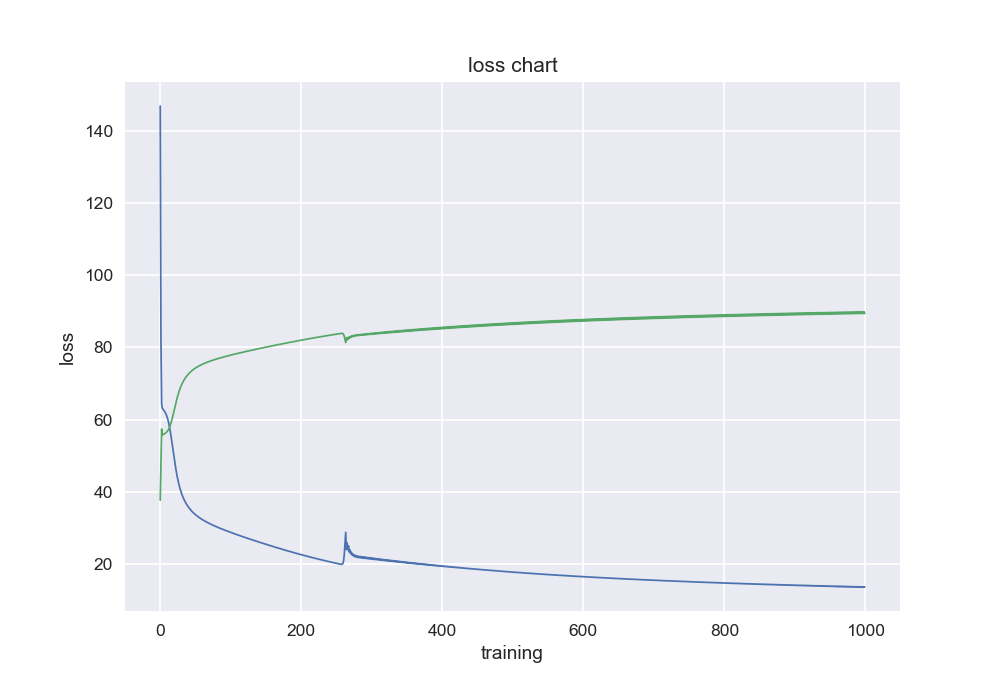

Text(0.5, 1.0, 'loss chart')

In [ ]:
plt.figure()
plt.plot(costs, linewidth=1)
plt.plot(accuracy, linewidth=1)
plt.xlabel('training')
plt.ylabel('loss')
plt.title('loss chart')

In [ ]:
# Validate our model
def validate(X_test, y_test, w0, w1):
    layer0 = X_test
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_test - layer2

    error = np.mean(np.abs(layer2_error))
    accuracy = (1 - error) * 100

    print("Accuracy " + str(round(accuracy,2)) + "%")

In [ ]:
# Checking training accuracy
validate(X_train, y_train, w0, w1)

Accuracy 89.92%


In [ ]:
# Checking test accuracy
validate(X_test, y_test, w0, w1)

Accuracy 87.39%
